**Termos de Machine Learning que iremos utilizar nesse projeto.**

- Sample == Uma linha do dataset "uma amostra"
- Feature == Caracteristica do sample

**Nesse dataset vamos trabalhar com 04 características da flor Iris:**
- Comprimento da sépala
- Largura da sépala
- Comprimento da pétala
- Largura da pétala


**Sépala: Parte externa que abraça a pétala*

In [0]:
"""Importando bibliotecas.
    - Matplotlib: Iremos cirar os gráficos com essa biblioteca
    - Scikit-learn: Essa biblioteca de ML possui vários algoritmos de classificação, regressão e agrupamento e etc.
        * load_iris : carrega o dataset que vamos trabalhar.
        * train_test_split : irá dividir o dataset em treino e teste.
        * KNeighborsClassifier : É um modelo de classificação em Machine Learning
    - Numpy: Para fazer cálculos númericos nos arrays
"""
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Carregamos o dataset na variável iris e verificamos quais são as suas colunas

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
# Quantidade de Sample e quais as Features do dataset

print(iris['DESCR'][:193]+"\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [0]:
# A coluna target_names retorna os tipos de flores Iris

iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [0]:
# A coluna feature_names exibe as caracteristicas da nossa sample

iris["feature_names"]

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [0]:
# Nosso dataset possui 150 sample e 4 feature
print(iris["data"].shape)

(150, 4)


In [0]:
# Perceba que cada um dos 12 sample exibidos possuem 4 feature

iris["data"][:12]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2]])

In [0]:
""" O target é a saída do seu treinamento classificatório e adiante iremos 
estudar como chega nesse resultado  
e o  0,1 e 2 representa Setosa , Vesicolor e Virginica respectivamente
"""
iris["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [0]:
""" O módulo train_test_split irá dividir o dataset em duas partes... 
    Uma com 75% do dataset que será usada para treinar o algoritmo para 
    realizar predições com os 25% restantes do dataset
"""
treino1,teste1,treino2,teste2 = train_test_split(iris["data"],iris["target"],random_state = 0)
print(treino1.shape)
print(teste1.shape)


(112, 4)
(38, 4)


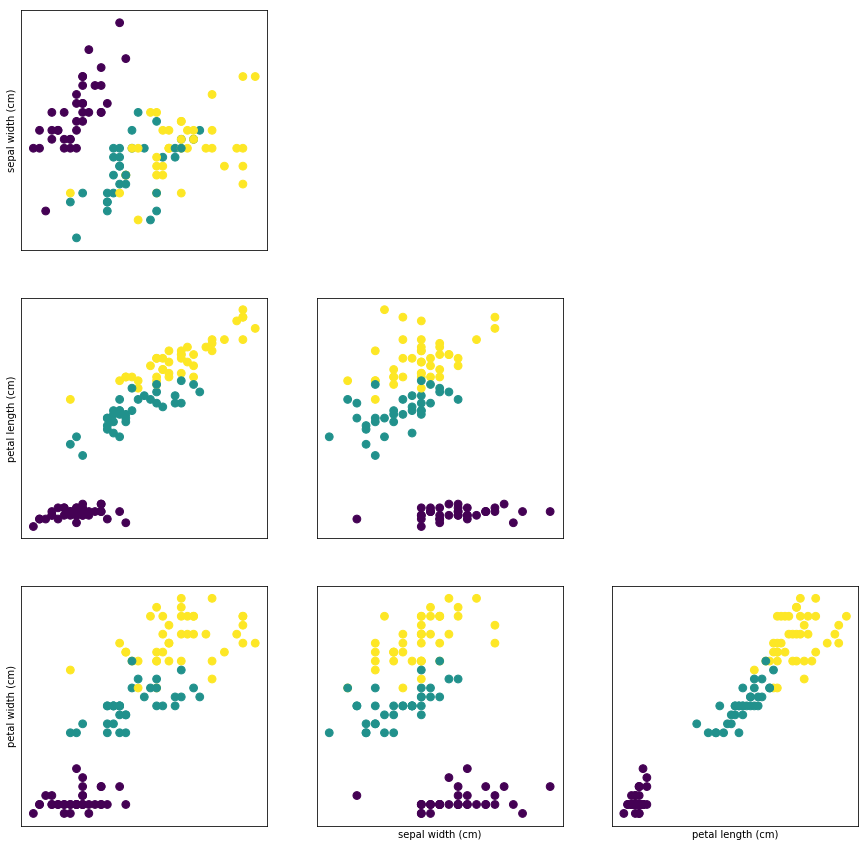

In [0]:
""" Usaremos o matplot para gerar um gráfico de disperção que nos dará a visualização 
    da distibuição dos dados de medição das pétadas e sépalas
"""
fig, ax = plt.subplots(3,3, figsize=(15,15))

for i in range(3):
  for j in range(3):
    ax[i,j].scatter(treino1[:,j],treino1[:,i+1], c = treino2, s= 60)
    ax[i,j].set_xticks(())
    ax[i,j].set_yticks(())
    if j == 0:
      ax[i,j].set_ylabel(iris["feature_names"][i+1])
    elif i == 2:
      ax[i,j].set_xlabel(iris["feature_names"][j])
    elif i < j :
      ax[i,j].set_visible(False)
    
    
      
    
    

In [0]:
""" O KNeighborsClassifier mapeia os dados existentes no dataset e quando o 
    modelo está pronto e são inseridos novos dados para predição , o algoritmo
    procura qual é o ponto mais próximo desse novo dado inserido.
    O argumento n_neighbors = 3 representa a quantidade de vizinhos que eu quero
    que o algortimo considere para fazer a previsão da flor.
"""

# Criando o modelo
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(treino1,treino2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [0]:
# Vamos inserir um novo dado de uma flor e descobrir se o algoritmo consegue prever.

#Testando o 1º modelo:
novo = np.array([[2, 1.8, 1.9, 0.3]])
novo.shape

(1, 4)

In [0]:
# A variavel predicao preveu [0] que coluna "target" é a flor da espécie Setosa

predicao = knn.predict(novo)
predicao

array([0])

In [0]:
# Conferindo o nome da espécie da flor descoberta

iris["target_names"][predicao]

array(['setosa'], dtype='<U10')

In [0]:
# Para saber a precisão do nosso modelo testado usamos a função score
knn.score(teste1,teste2)

0.9736842105263158

**O resultado foi de 97% de precisão!**